# Поиск показателей интенсивности движения 
## Цель:
* Определить несколько показателей загруженности на трассе I-94.

Станция, находилась примерно на полпути между Миннеаполисом и Сент-Полом, записывала данные о трафике. И фиксировала только  движение в западном направлении.

![image](https://s3.amazonaws.com/dq-content/524/i94_figma.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
print(traffic.info())
traffic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.6+ MB
None


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


Мы имеем 48204 строк и 9 столбцов, нулевые значения отсутствуют, большинство данных представлено числовыми значениями.
Значение столбцов: 
1. holiday - Праздничный день или нет.
2. temp - Температура в градусах кельвина.
3. rain_1h - Количество дождя в миллиметрах за час. 
4. snow_1h - Количесвто снега в миллиметрах за час.
5. clouds_all - Процент облачного покрова.
6. weather_main - Краткое текстовое описание текущей погоды. 
7. weather_description - Более длинное текстовое описание текущей погоды. 
8. date_time - Дата и время.
9. traffic_volume - Объём трафика в западном направлении.

In [3]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


Фиксация движения и погоды происходила с октября 2012 года до конца сентябрь 2018, каждый час.

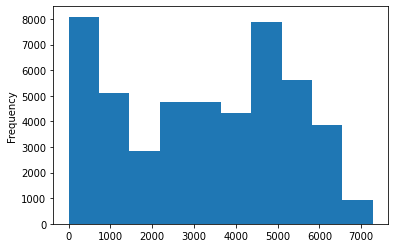

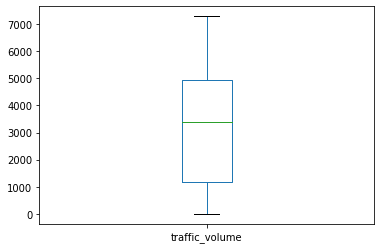

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [4]:
traffic["traffic_volume"].plot.hist()
plt.show()
traffic['traffic_volume'].plot.box()
plt.show()
traffic['traffic_volume'].describe()

За всё время количество проезжающих машин за час варьировалось от 0 до 7280. В 25% случаев станцию проезжало менее чем 1193 машины, скорее всего это происходило ночью. В 50% случаев проезжало 1200-4800, и в 25% 4800-7280, что в 4 раза меньше, чем значение предположительно ночного трафика. Рассмотрим наше предположение:

In [5]:
traffic['date_time'] = pd.to_datetime(traffic["date_time"])
day = traffic.copy()
night = traffic.copy()
day = day[(day["date_time"].dt.hour >= 7)&(day["date_time"].dt.hour < 19)]
night = night[(night["date_time"].dt.hour < 7)|(night["date_time"].dt.hour >= 19)]

Мы разделили наши данные на условно дневное (с 7 до 19) и ночное (с 19 до 7) время, чтобы сделать вывод о трафике на основе времени.  

day: count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
night: count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


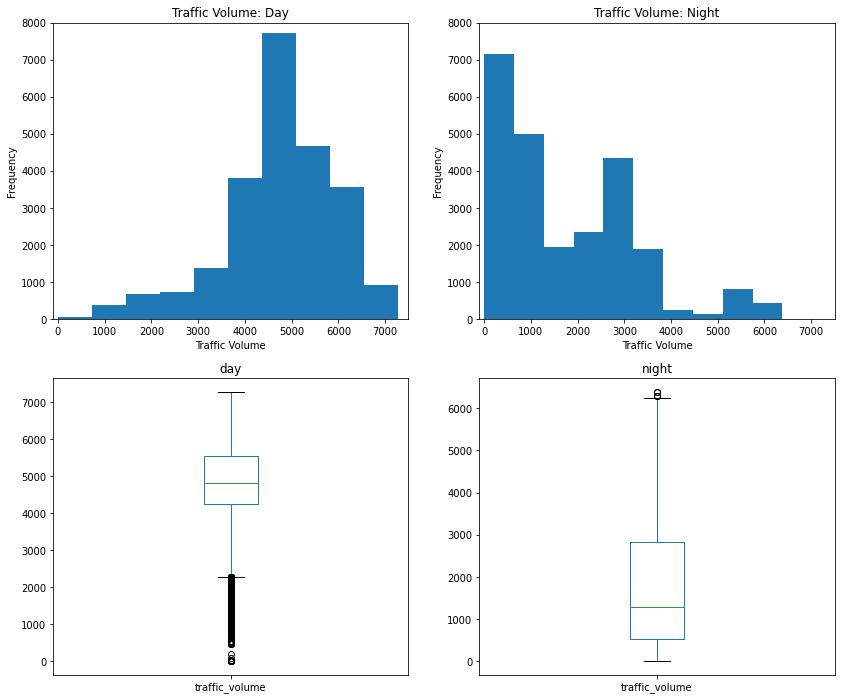

<AxesSubplot:xlabel='hour', ylabel='traffic_volume'>

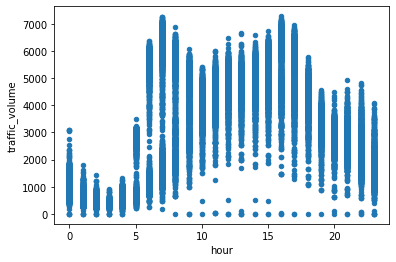

In [6]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
plt.hist(day["traffic_volume"])
plt.title("Traffic Volume: Day")
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.xlim(-100,7500)
plt.subplot(2,2,2)
plt.hist(night["traffic_volume"])
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.ylim(0,8000)
plt.xlim(-100,7500)
plt.subplot(2,2,3)
day['traffic_volume'].plot.box()
plt.title("day")
plt.subplot(2,2,4)
night['traffic_volume'].plot.box()
plt.title("night")
print("day:", day['traffic_volume'].describe())
print("night:", night['traffic_volume'].describe())
plt.show()
tr = traffic.copy()
tr["hour"] = tr["date_time"].dt.hour
tr.plot.scatter("hour", "traffic_volume")

75% значений объёма дневного трафика выше 4252 машин за час, в то время как 75% значений объёма ночного трафика меньше 2819. Наша цель - найти индикаторы интенсивного трафика, поэтому в дальнейшем мы сосредоточимся только на дневных данных.

# Анализ дневных данных
## Интенсивность трафика по месяцам

In [7]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()

Text(0, 0.5, 'traffic_volume')

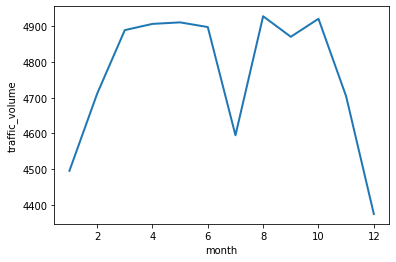

In [8]:
by_month['traffic_volume'].plot.line(linewidth=2)
plt.ylabel("traffic_volume")

С марта по ноябрь интенсивность движения высокое за исключением июля, а в холодное время с ноября по март интенсивность меньше. Расмотрим июль каждого года:

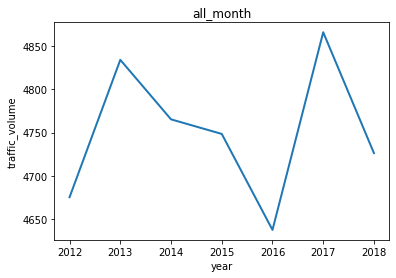

Text(0, 0.5, 'traffic_volume')

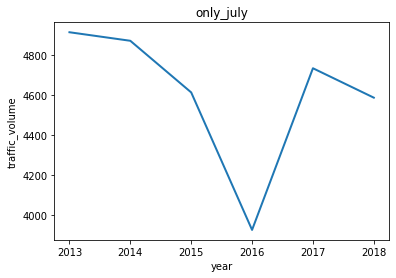

In [9]:
day["year"] = day["date_time"].dt.year
by_year = day.groupby('year').mean()
by_year["traffic_volume"].plot.line(linewidth=2)
plt.title("all_month")
plt.ylabel("traffic_volume")
plt.show()
day[day["month"]==7].groupby("year").mean()['traffic_volume'].plot.line(linewidth=2)
plt.title("only_july")
plt.ylabel("traffic_volume")

В 2016 произошёл резкий упадок интенсивности трафика, скорее всего, из-за [ремонта трассы](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) в июле, так что можно сделать вывод, что в теплое всремя года, интенсивность трафика на трассе значительно больше.

## Интенсивность трафика по дням недели

Text(0.5, 0, 'day of week')

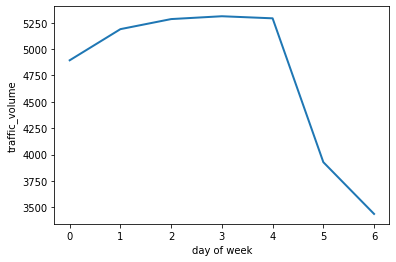

In [10]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line(linewidth=2)  # 0 is Monday, 6 is Sunday
plt.ylabel("traffic_volume")
plt.xlabel("day of week")

Трафик немного увеличивается с понедельника по среду, а в субботу и воскресенье резко падает.

## Интенсивность трафика по времени суток

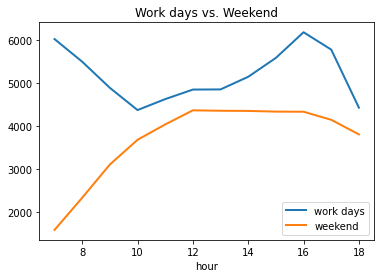

In [11]:
day["hour"] = day["date_time"].dt.hour
work_days = day[day['dayofweek'] <= 4].copy()
weekend = day[day['dayofweek']>=5].copy()
by_hour_work = work_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()
by_hour_work["traffic_volume"].plot.line(label="work days", linewidth=2)
by_hour_weekend["traffic_volume"].plot.line(label="weekend",linewidth=2)
plt.title("Work days vs. Weekend")
plt.legend()

С 7 до 10 в рабочии дни интенсивность падает, потом растет до 16, а потом снова начинает стремительно падать. В выходные дни интенсивность трафика растет с 7 до 12, а после начинает стагнировать и с 16 постепенно деградировать.

## Выводы:
* Движение обычно более интенсивное в теплые месяцы (март – октябрь) по сравнению с холодными месяцами (ноябрь – февраль).
* В рабочие дни трафик обычно выше, чем в выходные.
* В рабочие дни час пик - около 7-16.

## Корреляция с погодными условиями 

In [12]:
day[['temp', 'rain_1h', 'snow_1h', 'clouds_all','traffic_volume']].corr()[:4]['traffic_volume']

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

Наибольшая корреляция с значением traffic_volume c температурой воздуха, но она слишком мала для выводов. Ниже мы приведем график с этой зависимостью. 

<AxesSubplot:xlabel='temp', ylabel='traffic_volume'>

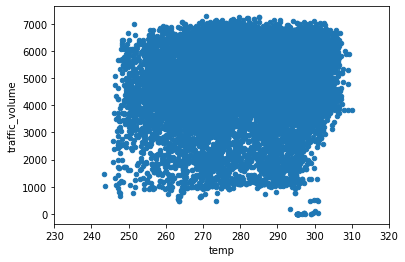

In [13]:
day.plot.scatter("temp",'traffic_volume', xlim=(230, 320))

Надежная зависимость отсутствует.

<AxesSubplot:ylabel='weather_main'>

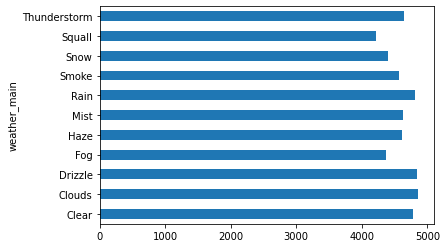

In [14]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()
by_weather_main["traffic_volume"].plot.barh()

Распределение достаточно ровное, шквал и туман оказывают влияние, поскольку это типы погод находятся внизу.

<AxesSubplot:ylabel='weather_description'>

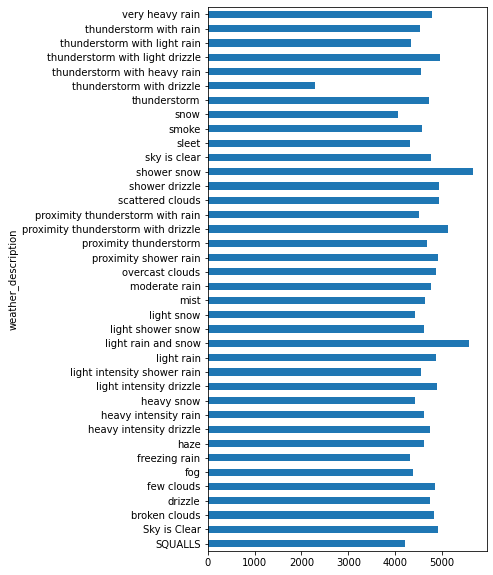

In [15]:
by_weather_description["traffic_volume"].plot.barh(figsize=(5,10))

Во время снегопада и легкого дождя интенсивность трафика на порядок выше, чем во время других климатических явлений. Это можно объяснить тем, что такая погода не слишком плоха для того, чтобы выйти из дома, но при этом погулять в парке, рокататься на велосипеде не получится, а передвежение на транспорте такая погода не ограничивает. Гроза с дождем самое неблагоприятное погодное. 

# Анализ ночных данных 
## Интенсивность трафика по месяцам

<AxesSubplot:xlabel='month'>

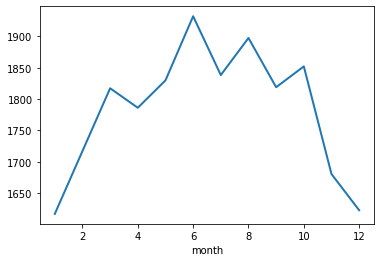

In [16]:
night['month'] = night['date_time'].dt.month
by_month_n = night.groupby('month').mean()
by_month_n['traffic_volume'].plot.line(linewidth=2)

С ночных данных наш вывод остается неизменным, в теплое время года (март – октябрь), но данные не так постоянны, есть скачки в июне и августе.

## Интенсивность трафика по дням недели

Text(0.5, 0, 'day of week')

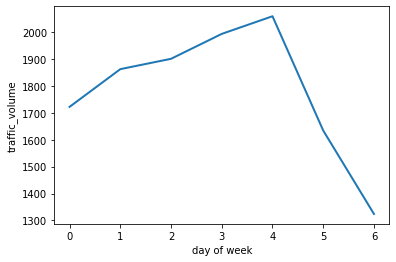

In [17]:
night['dayofweek'] = night['date_time'].dt.dayofweek
by_dayofweek_n = night.groupby('dayofweek').mean()
by_dayofweek_n['traffic_volume'].plot.line(linewidth=2)
plt.ylabel("traffic_volume")
plt.xlabel("day of week")

Зависимость сохранилась - с понедельника по пятницу интенсивность растет, потом в субботу и воскресенье происходит резкое падание.

## Интенсивность трафика по времени суток

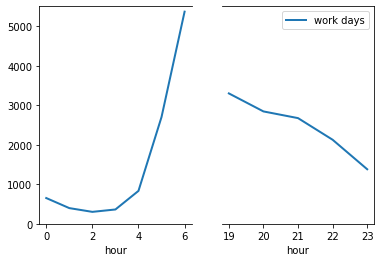

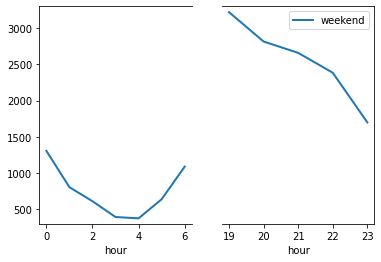

In [18]:
night['hour'] = night['date_time'].dt.hour

work_days_n = night[night['dayofweek']<=4].copy()
weekend_n = night[night['dayofweek']>=5].copy()

work_days_n_6 = work_days_n[work_days_n['hour']<=6]
work_days_n_19 = work_days_n[work_days_n['hour']>6]
weekend_n_6 = weekend_n[weekend_n['hour']<=6]
weekend_n_19 = weekend_n[weekend_n['hour']>6]

by_hour_work_n_6 = work_days_n_6.pivot_table('traffic_volume', 'hour')
by_hour_work_n_19 = work_days_n_19.pivot_table('traffic_volume', 'hour')
by_hour_weekend_n_6 = weekend_n_6.pivot_table('traffic_volume', 'hour')
by_hour_weekend_n_19 = weekend_n_19.pivot_table('traffic_volume', 'hour')

plt.figure()
plt.subplot(1,2,1)
by_hour_work_n_6['traffic_volume'].plot.line(label="work days", linewidth=2, ylim=(0,5500)).spines['right'].set_visible(False)

plt.subplot(1,2,2)
by_hour_work_n_19['traffic_volume'].plot.line(label="work days", linewidth=2, ylim=(0,5500)).spines['left'].set_visible(False)
plt.yticks([])
plt.legend()
plt.show()

plt.figure()
plt.subplot(1,2,1)
by_hour_weekend_n_6['traffic_volume'].plot.line(label="weekend", linewidth=2, ylim=(300,3300)).spines['right'].set_visible(False)

plt.subplot(1,2,2)
by_hour_weekend_n_19['traffic_volume'].plot.line(label="weekend", linewidth=2, ylim=(300,3300)).spines['left'].set_visible(False)
plt.yticks([])
plt.legend()

И в выходные и в рабочее время с 19 по 3 интенсивность трафика и с 4 до 6 растет, и продолжает расти днём, как мы уже узнали.

## Корреляция с погодными условиями 

In [19]:
night[['temp', 'rain_1h', 'snow_1h', 'clouds_all','traffic_volume']].corr()[:4]['traffic_volume']

temp          0.094004
rain_1h      -0.012972
snow_1h      -0.007453
clouds_all    0.012832
Name: traffic_volume, dtype: float64

В ночных данных сильных корреляций нет.

<AxesSubplot:ylabel='weather_main'>

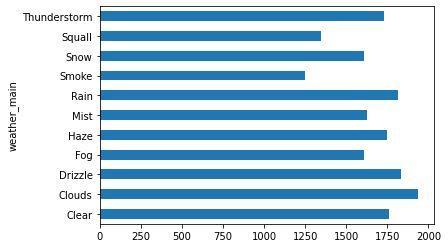

In [20]:
by_weather_main_n = night.groupby('weather_main').mean()
by_weather_description_n = night.groupby('weather_description').mean()
by_weather_main_n["traffic_volume"].plot.barh()

Шквал и дым отрицательно влиляют на интенсивность трафика. Облачность положительно влияют на интенсивность трафика.

<AxesSubplot:ylabel='weather_description'>

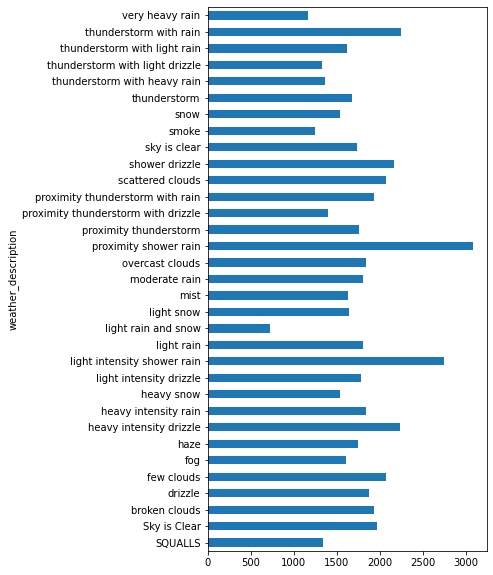

In [21]:
by_weather_description_n["traffic_volume"].plot.barh(figsize=(5,10))

Приближение ливня, проливной дождь - типы погоды с наибольшей интенсивностью трафика с большим отрывом от других типов.